In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# What is going to be done in this Project---- Brief Intro

# Objective

Provide customized recommendations to customer based on customer segmentation derived from RFM analysis.



In [2]:
data=pd.read_csv(r"D:\Github_Project_COpy\Capstone_Updated\OnlineRetail (3).csv",skipinitialspace=True,encoding="latin1")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Dropping the Null values and checking the null values after that
df= data.dropna(subset=['CustomerID'])   
df.isnull().sum().sum()

0

In [7]:
#check and clean duplicate data
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
from datetime import datetime
from datetime import timedelta
Converted_Invoice = {'InvoiceDate': str}
df = df.astype(Converted_Invoice)
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [13]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['order_date'] = [d.date() for d in df['InvoiceDate']]
df['order_time'] = [d.time() for d in df['InvoiceDate']]

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [15]:
df['order_date']= pd.to_datetime(df['order_date'])
date = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [17]:
date

datetime.datetime(2018, 11, 10, 10, 55, 31)

In [18]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
#New Total Sum Column  
df['TotalSum'] = df['UnitPrice']* df['Quantity']
#Data preparation steps
print('Min Invoice Date:',df.order_date.dt.date.min(),'max Invoice Date:',df.order_date.dt.date.max())
df.head(3)

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00


In [21]:
snapshot_date = df['order_date'].max() + dt.timedelta(days=1)

snapshot_date

#The last day of purchase in total is 09 DEC, 2011. To calculate the day periods,

#let's set one day after the last one,or

#10 DEC as a snapshot_date. We will cound the diff days with snapshot_date.

Timestamp('2011-12-10 00:00:00')

# Calculate RFM Metrics


In [23]:
rfm = df.groupby(['CustomerID']).agg({'order_date': lambda x : (snapshot_date - x.max()).days,'InvoiceNo':'count','TotalSum': 'sum'})

In [24]:
rfm

,order_date,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [25]:
# Rename columns 

rfm.rename(columns={'order_date':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace= True)

In [26]:
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [27]:
#Final RFM values
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [28]:
# Building RFM Segments
r_labels =range(4,0,-1)

f_labels=range(1,5)

m_labels=range(1,5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)

f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)

m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)

rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score

def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )

rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,311,17,334.40,1,1,2,1.01.02.0,4


In [29]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
4.04.04.0    443
1.01.01.0    381
3.04.04.0    222
1.02.02.0    206
2.01.01.0    181
dtype: int64

In [30]:
# Summary metrics per RFM Score

rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           261.2       8.2         157.4   381
4           177.0      13.6         239.6   391
5           152.9      21.1         366.8   519
6            96.1      28.0         818.9   461
7            80.7      38.2         763.0   456
8            64.2      56.2         987.3   459
9            46.6      78.9        1804.5   410
10           33.0     110.9        2065.2   428
11           21.6     187.2        4050.3   390
12            7.6     371.0        9393.2   443

In [32]:
def segments(df):

    if df['RFM_Score'] > 9 :

        return 'Gold'

    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):

        return 'Silver'

    else:

        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',

'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            192.2      15.0         266.5  1291
Gold               20.6     225.9        5253.6  1261
Silver             72.6      49.5        1074.2  1786

# Merged rfm and main dataframe



In [33]:
mdf=pd.merge(df,rfm,on='CustomerID')

In [34]:
mdf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,15.00,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392688,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392689,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392690,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,24.96,1,38,848.55,4,2,3,4.02.03.0,9,Silver


In [35]:
# Created 3 data frames based on RFM segments to perform MBA.

In [36]:
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']

Bronze_seg

Silver_seg = mdf[mdf.General_Segment == 'Bronze']

Silver_seg

Gold_seg = mdf[mdf.General_Segment == 'Bronze']

Gold_seg



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
744,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,09:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
745,537767,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-08 12:09:00,10.95,15100.0,United Kingdom,2010-12-08,12:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
746,540563,21258,VICTORIAN SEWING BOX LARGE,16,2011-01-10 10:35:00,10.95,15100.0,United Kingdom,2011-01-10,10:35:00,175.20,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
3668,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,2010-12-01,09:53:00,19.35,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
3669,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,2010-12-01,09:53:00,31.20,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388222,577755,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388223,577755,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388224,577755,22530,MAGIC DRAWING SLATE DOLLY GIRL,24,2011-11-21 14:49:00,0.42,17010.0,United Kingdom,2011-11-21,14:49:00,10.08,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388225,577755,22492,MINI PAINT SET VINTAGE,36,2011-11-21 14:49:00,0.65,17010.0,United Kingdom,2011-11-21,14:49:00,23.40,19,11,195.36,3,1,1,3.01.01.0,5,Bronze


# Data Pre-Processing for K-means Clustering
We must check these Key k-means assumptions before we implement our K-means clustering Mode

Symmetric distribution of variables (not skewed)
Variables with same average values
Variables with same variance

In [37]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     93.059474    90.523744    2048.688081
std     100.012264   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.750000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

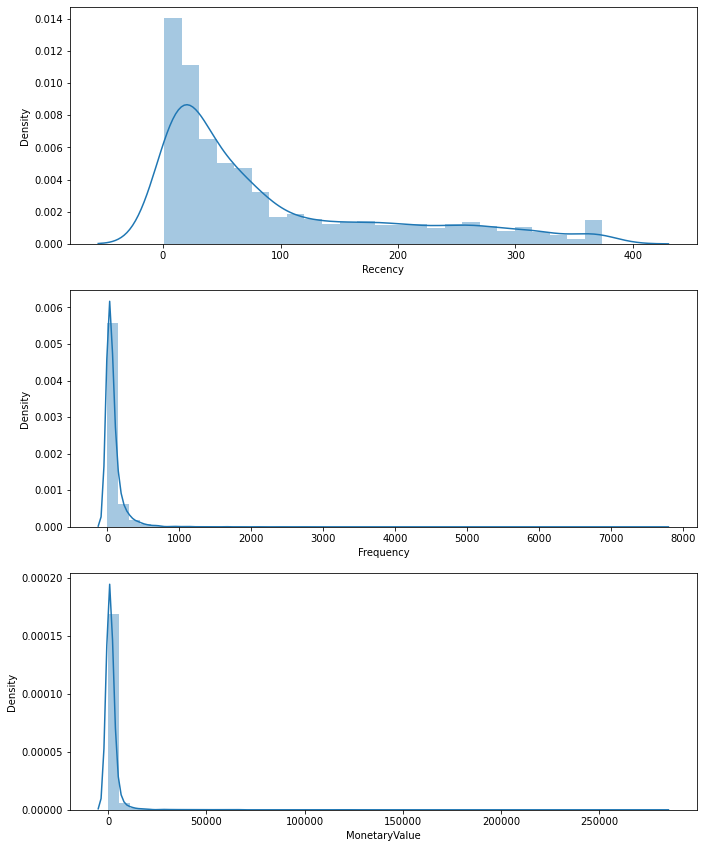

In [39]:
# Plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')

plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')

plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')

plt.style.use('fivethirtyeight')

plt.tight_layout()

plt.show()

# Unskew the data with log transformation


In [40]:
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

In [41]:
rfm_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.787,0.000,11.254
12347.0,1.099,5.204,8.369
12348.0,4.331,3.434,7.494
12349.0,2.944,4.290,7.472
12350.0,5.740,2.833,5.812
...,...,...,...
18280.0,5.628,2.303,5.196
18281.0,5.198,1.946,4.392
18282.0,2.079,2.485,5.182


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

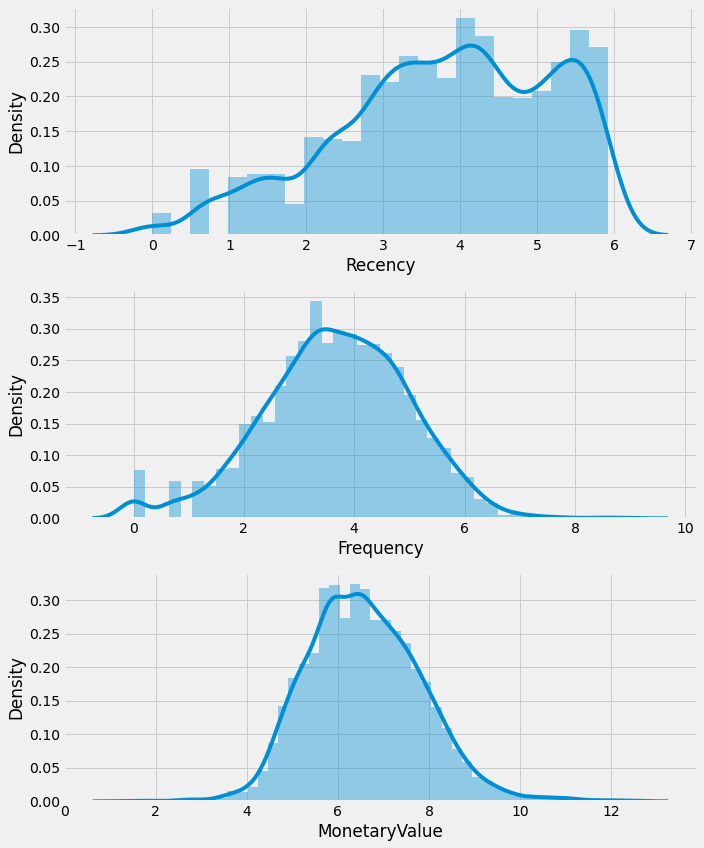

In [42]:
#or rfm_log = np.log(rfm_rfm)
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [43]:
#Implementation of K-Means Clustering
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

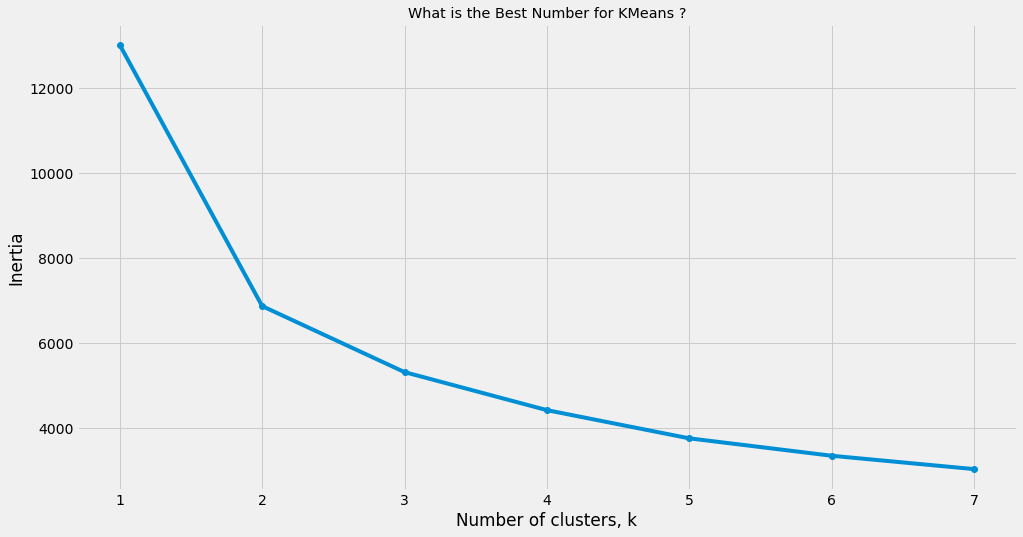

In [45]:
#Choosing no of Clusters
from sklearn.cluster import KMeans
#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

# Clustering

In [46]:

kc = KMeans(n_clusters= 3, random_state=1)

kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame

cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:

rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:

rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',

                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           172.0      15.0         294.0  1524
1            69.0      65.0        1158.0  1854
2            14.0     260.0        6555.0   960

In [55]:

rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)

rfm_normalized['K_Cluster'] = kc.labels_

rfm_normalized['General_Segment'] = rfm['General_Segment']

rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each

rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','General_Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],var_name='Metric',value_name='Value')


rfm_melt.head()

,CustomerID,General_Segment,K_Cluster,Metric,Value
0,12346.0,Silver,1,Recency,1.435500
1,12347.0,Gold,2,Recency,-1.953082
2,12348.0,Silver,1,Recency,0.383073
3,12349.0,Gold,1,Recency,-0.619479
4,12350.0,Bronze,0,Recency,1.401527


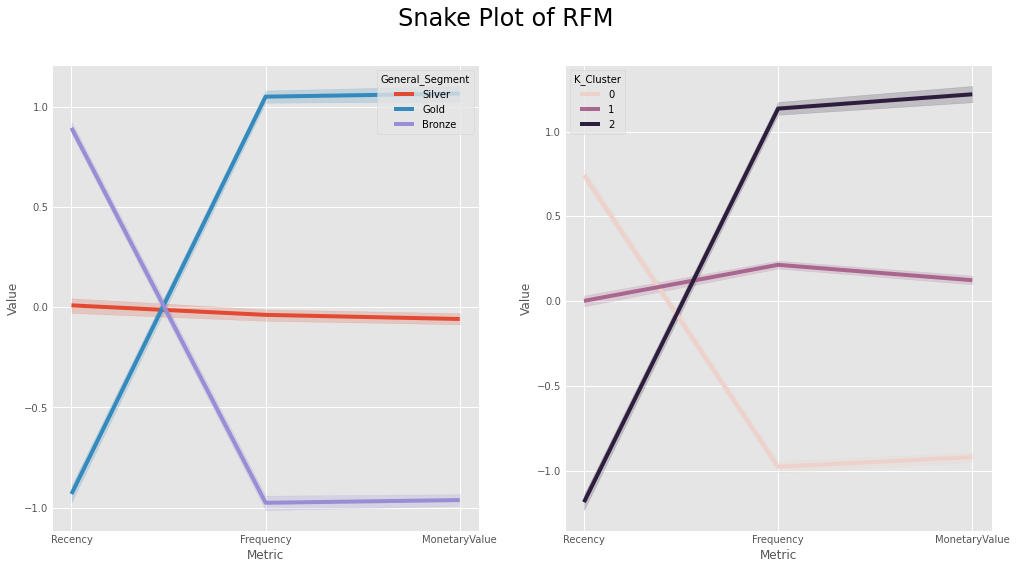

In [56]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))

sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means

sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 

plt.show()

# Market Basket Analysis
# Apriori Algorithm
Apriori algorithm works on the principle of how two or more products/objects are associated with each other. In orther words, we can say that it is an algorithm that analyzes customers who bought product A also bought product B. Generally it works on datasets containing large number of transactions.

In [57]:
basket_bronze = (Bronze_seg.groupby(['InvoiceNo', 'Description'])['Quantity']

          .sum().unstack().reset_index().fillna(0)

          .set_index('InvoiceNo'))

basket_bronze.head() 

basket_bronze.copy = basket_bronze 

basket_bronze.copy.head() 


basket_bronze.copy = basket_bronze.copy.astype(int)


basket_bronze.copy.shape



(1711, 2830)

In [58]:
def encode_units(x):

    if x <= 0:

        return 0

    if x >= 1:

        return 1

basket_bronze_sets = basket_bronze.copy.applymap(encode_units)

basket_bronze_sets.drop('POSTAGE', inplace=True, axis=1)

basket_bronze_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Import necessary libraries required for market basket analysis

In [59]:
from mlxtend.frequent_patterns import apriori

from mlxtend.frequent_patterns import association_rules

%matplotlib inline


frequent_itemsets_bronze = apriori(basket_bronze_sets, min_support=0.03, use_colnames=True)

#Build frequent itemsets

frequent_itemsets_bronze['length'] = frequent_itemsets_bronze['itemsets'].apply(lambda x: len(x))

frequent_itemsets_bronze  


rules_bronze = association_rules(frequent_itemsets_bronze, metric="lift", min_threshold=1)

rules_bronze

C:\Users\ss\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [60]:
#Products having 70% confidence likely to be purchased together

rules_bronze[(rules_bronze['lift'] >= 6) & (rules_bronze['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Item Based Collaborative Filtering for Bronze Segment


It is an approach to predict the customers’ choice and find the products that customers might tend to buy on the basis of the data collected from a large number of different customers having similar choices or preferences. The basic consideration is that if person A and person B have some kind of reaction to some items, then they might have the same preferences or opinion towards other items too.

Co-occurence Matrix

In [61]:
CID_PN_matrix = Bronze_seg.pivot_table(index = ["InvoiceNo"], columns = ["Description"], 

                              values = "Quantity").fillna(0)

basket_bronze_set = CID_PN_matrix.applymap(encode_units)

basket_bronze_set_int = basket_bronze_set.astype(int)

coocM_Bronze = basket_bronze_set_int.T.dot(basket_bronze_set_int)

x_Bronze = pd.DataFrame(coocM_Bronze.idxmax()).reset_index()

x_Bronze.columns = ["A", "B"]

x_Bronze



,A,B
0,10 COLOUR SPACEBOY PEN,10 COLOUR SPACEBOY PEN
1,12 COLOURED PARTY BALLOONS,12 COLOURED PARTY BALLOONS
2,12 DAISY PEGS IN WOOD BOX,12 DAISY PEGS IN WOOD BOX
3,12 EGG HOUSE PAINTED WOOD,12 EGG HOUSE PAINTED WOOD
4,12 IVORY ROSE PEG PLACE SETTINGS,12 IVORY ROSE PEG PLACE SETTINGS
...,...,...
2825,ZINC SWEETHEART WIRE LETTER RACK,ZINC SWEETHEART WIRE LETTER RACK
2826,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STAR LARGE
2827,ZINC T-LIGHT HOLDER STARS SMALL,ZINC T-LIGHT HOLDER STARS SMALL
2828,ZINC TOP 2 DOOR WOODEN SHELF,ABSTRACT CIRCLES SKETCHBOOK


In [62]:
r_Bronze = x_Bronze[x_Bronze["A"] != x_Bronze["B"]]

r_Bronze.head(10)

matrix_Bronze = Bronze_seg.pivot_table(index = ["InvoiceNo"], columns = ["Description"], 

                              values = "Quantity")

matrix_Bronze.head(10)

whiteHeart = matrix_Bronze["WHITE HANGING HEART T-LIGHT HOLDER"]

whiteHeart.head()


InvoiceNo
536374   NaN
536384   NaN
536388   NaN
536393   NaN
536403   NaN
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

In [63]:
similarProductsW_Bronze = matrix_Bronze.corrwith(whiteHeart)

similarProductsW_Bronze = similarProductsW_Bronze.dropna()

df1 = pd.DataFrame(similarProductsW_Bronze)

df1.head(10)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
Description,
12 DAISY PEGS IN WOOD BOX,0.866025
12 IVORY ROSE PEG PLACE SETTINGS,1.000000
12 PENCILS SMALL TUBE RED RETROSPOT,1.000000
12 PENCILS SMALL TUBE SKULL,0.944911
12 PENCILS TALL TUBE POSY,0.785714
3 HOOK PHOTO SHELF ANTIQUE WHITE,-0.186339
36 FOIL HEART CAKE CASES,1.000000
36 PENCILS TUBE POSY,-1.000000
36 PENCILS TUBE RED RETROSPOT,1.000000


In [64]:
corrMatrix_Bronze = matrix_Bronze.corr()

corrMatrix_Bronze.head()

second_customer_Bronze = matrix_Bronze.iloc[1].dropna()

second_customer_Bronze.head()


Description
CLASSIC METAL BIRDCAGE PLANT HOLDER     2.0
COLOUR GLASS T-LIGHT HOLDER HANGING    48.0
CREAM HEART CARD HOLDER                 4.0
ENAMEL BREAD BIN CREAM                  8.0
ENAMEL FIRE BUCKET CREAM                6.0
Name: 536384, dtype: float64

In [65]:
simProducts_Bronze = pd.Series()

C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3774188565.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simProducts_Bronze = pd.Series()


In [67]:

for i in range(0, len(second_customer_Bronze.index)):

    print("Adding sims for " + second_customer_Bronze.index[i] + "....")

    #Retrieve similar products to the ones bought by customer 2

    sims_Bronze = corrMatrix_Bronze[second_customer_Bronze.index[i]].dropna()

    #Scale to how many of the products were bought

    sims_Bronze = sims_Bronze.map(lambda x: x * second_customer_Bronze[i])

    # Add to the list of similar products

    simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)

print("sorting...")

simProducts_Bronze.sort_values(inplace = True, ascending = True)

print(simProducts_Bronze)

Adding sims for CLASSIC METAL BIRDCAGE PLANT HOLDER....
Adding sims for COLOUR GLASS T-LIGHT HOLDER HANGING....
Adding sims for CREAM HEART CARD HOLDER....
Adding sims for ENAMEL BREAD BIN CREAM....
Adding sims for ENAMEL FIRE BUCKET CREAM....
Adding sims for ENAMEL FLOWER JUG CREAM....
Adding sims for HANGING MEDINA LANTERN SMALL....
Adding sims for HANGING METAL HEART LANTERN....
Adding sims for HEART OF WICKER LARGE....
Adding sims for HEART OF WICKER SMALL....


C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze =

Adding sims for NATURAL SLATE HEART CHALKBOARD ....
Adding sims for WHITE LOVEBIRD LANTERN....
Adding sims for WOOD BLACK BOARD ANT WHITE FINISH....
sorting...
SET OF 6 SPICE TINS PANTRY DESIGN   -48.0
HANGING MEDINA LANTERN SMALL        -48.0
SET OF 4 ROSE BOTANICAL CANDLES     -48.0
SAVE THE PLANET COTTON TOTE BAG     -48.0
PICNIC BASKET WICKER LARGE          -48.0
                                     ... 
ROSES REGENCY TEACUP AND SAUCER      48.0
ENAMEL BREAD BIN CREAM               48.0
EMERGENCY FIRST AID TIN              48.0
IVORY HANGING DECORATION  EGG        48.0
IVORY HANGING DECORATION  EGG        48.0
Length: 1578, dtype: float64


C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
C:\Users\ss\AppData\Local\Temp\ipykernel_6644\3001910035.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze =

In [69]:
simProducts_Bronze= simProducts_Bronze.groupby(simProducts_Bronze.index).sum().sort_values(ascending = False)

filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index)

filteredSims_Bronze.head(5)

CANDLEHOLDER PINK HANGING HEART       297.662372
METAL 4 HOOK HANGER FRENCH CHATEAU    277.703363
ROSES REGENCY TEACUP AND SAUCER       259.547885
GREEN REGENCY TEACUP AND SAUCER       256.826960
SINGLE ANTIQUE ROSE HOOK IVORY        256.000000
dtype: float64

In [ ]:
In this way you need to run the Apriori algorithm as well as Item based collaborative filtering algorithm for other segments to provide customised recommendations to the customer from those segments.



In [ ]:
Comparison of Algorithms

After running the algorithm for all the segments, this analysis shows 
that as the support values decreases or move towards less than or equal 
to 0.01, sometimes Apriori Algorithm fails to generate the frequent patterns as it gets involved in infinite loop. Also, as minimum support increases the frequent item set generated decreases.

To generate association rules for such heavy datasets, all 
the algorithms have different run-time due to their unique execution 
processes. As per the analysis, Apriori was efficient in terms of run
-time. IBCF took a long time. It was observed that the execution time 
for Item based collaborative filtering was 840 seconds and for Apriori 
algorithm was 480 seconds

In [ ]:
Conclusion on RFM Analysis
In this tutorial we have learned about the Apriori algorithm and item based collaborative filtering and how it 
is coupled with RFM analysis to generate personalized recommendations 
based on customer’s segment which is associated his buying behaviour.
The code is designed in such a way that it enables you to
first implement RFM analysis and compare those segments with clusters
formed using K Means Clustering. Further we have executed Market Basket
Analysis for Bronze segment.

I hope this tutorial gave you overview of the RFM analysis and market
basket analysis and its implementation using python.